<a href="https://colab.research.google.com/github/poojabhateley/Challenge_Recommendations/blob/master/Challenge_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [85]:
df_chall=pd.read_csv('/content/challenges.csv')

In [86]:
df_chall.head()

,challenge_id,contest_id,domain,subdomain,difficulty,solved_submission_count,total_submissions_count
0,18e0a2dad5e127d6,c8ff662c97d345d2,Artificial Intelligence,Bot Building,0.978261,319.0,655.0
1,0251520ace81bc57,c8ff662c97d345d2,Algorithms,Strings,0.894473,765.0,1267.0
2,425f241df843cd89,c8ff662c97d345d2,Algorithms,Strings,0.908853,1247.0,1864.0
3,970eca328814a522,c8ff662c97d345d2,Algorithms,Strings,0.902722,453.0,835.0
4,46592c29655cfc5e,c8ff662c97d345d2,Algorithms,Strings,0.900000,312.0,1363.0


In [87]:
df_sub=pd.read_csv('/content/submissions.csv')

In [88]:
df_sub.head()

,user_id,contest_id,challenge_id,language,solved,created_at
0,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:36:53 UTC
1,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:38:45 UTC
2,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:43:49 UTC
3,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:52:34 UTC
4,56d47667c6a9242e,c8ff662c97d345d2,6d95afeb4d968b91,java,0,2011-08-07 00:56:52 UTC


In [89]:
df_chall.shape

(2785, 7)

In [90]:
df_chall.isnull().sum()

challenge_id               2492
contest_id                 2492
domain                     2656
subdomain                  2656
difficulty                 2492
solved_submission_count    2492
total_submissions_count    2492
dtype: int64

In [91]:
df_chall.dropna(axis=0,how='all',inplace=True)

In [92]:
df_chall.shape

(293, 7)

In [93]:
df_chall.isnull().sum()

challenge_id                 0
contest_id                   0
domain                     164
subdomain                  164
difficulty                   0
solved_submission_count      0
total_submissions_count      0
dtype: int64

In [94]:
(df_chall['domain'].value_counts())/len(df_chall)*100

Algorithms                 22.184300
Regex                       5.802048
SQL                         4.095563
Mathematics                 2.730375
Data Structures             2.047782
Artificial Intelligence     2.047782
Java                        1.365188
Tutorials                   1.365188
C++                         1.023891
Security                    0.682594
Python                      0.682594
Name: domain, dtype: float64

In [95]:
(df_chall['subdomain'].value_counts())/len(df_chall)*100

Implementation            6.484642
Strings                   4.436860
Introduction              4.436860
Sorting                   4.436860
Basic Select              4.095563
Warmup                    2.730375
Dynamic Programming       2.730375
Fundamentals              2.389078
Bot Building              2.047782
Repetitions               1.706485
Linked Lists              1.706485
30 Days of Code           1.365188
Grouping and Capturing    1.023891
Character Class           1.023891
Graph Theory              1.023891
Functions                 0.682594
Arrays                    0.341297
Basic Data Types          0.341297
Search                    0.341297
Combinatorics             0.341297
Greedy                    0.341297
Name: subdomain, dtype: float64

In [96]:
df_chall["domain"]=df_chall["domain"].fillna('Algorithms')

In [97]:
df_chall.isnull().sum()

challenge_id                 0
contest_id                   0
domain                       0
subdomain                  164
difficulty                   0
solved_submission_count      0
total_submissions_count      0
dtype: int64

In [98]:
df_chall['subdomain'] = df_chall.groupby('domain').transform(lambda x: x.fillna(x.mode()[0]))['subdomain']

In [99]:
df_chall.isnull().sum()

challenge_id               0
contest_id                 0
domain                     0
subdomain                  0
difficulty                 0
solved_submission_count    0
total_submissions_count    0
dtype: int64

In [100]:
(df_chall['subdomain'].value_counts())/len(df_chall)*100

Implementation            62.457338
Strings                    4.436860
Introduction               4.436860
Sorting                    4.436860
Basic Select               4.095563
Warmup                     2.730375
Dynamic Programming        2.730375
Fundamentals               2.389078
Bot Building               2.047782
Repetitions                1.706485
Linked Lists               1.706485
30 Days of Code            1.365188
Grouping and Capturing     1.023891
Character Class            1.023891
Graph Theory               1.023891
Functions                  0.682594
Arrays                     0.341297
Basic Data Types           0.341297
Search                     0.341297
Combinatorics              0.341297
Greedy                     0.341297
Name: subdomain, dtype: float64

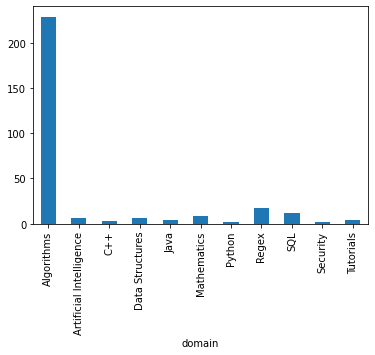

In [101]:
df_chall.groupby('domain')['challenge_id'].count().plot.bar()

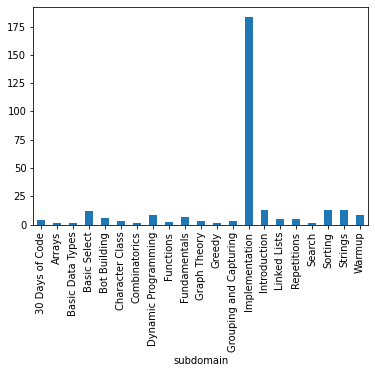

In [102]:
df_chall.groupby('subdomain')['challenge_id'].count().plot.bar()

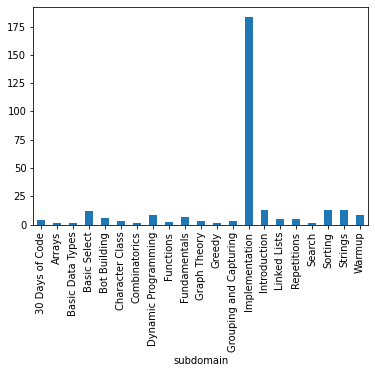

In [103]:
df_chall.groupby('subdomain')['total_submissions_count'].count().plot.bar()

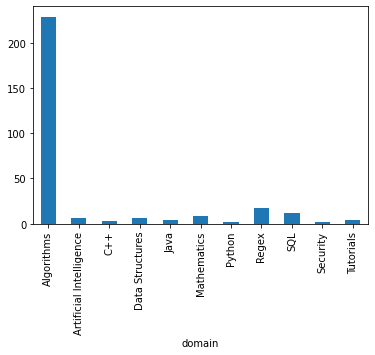

In [104]:
df_chall.groupby('domain')['total_submissions_count'].count().plot.bar()

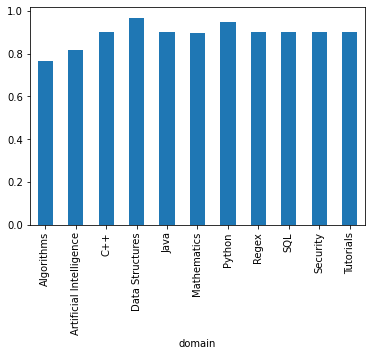

In [105]:
df_chall.groupby('domain')['difficulty'].mean().plot.bar()

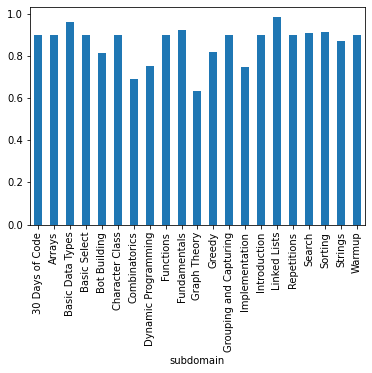

In [106]:
df_chall.groupby('subdomain')['difficulty'].mean().plot.bar()

In [107]:
df_chall['contest_id'].value_counts()/len(df_chall)*100

c8ff662c97d345d2    45.392491
5d70c374e6959faf    17.406143
2b5fd89bb50d6c59     3.071672
63facc3d92e52a61     2.047782
29602fc1cf9ce49b     2.047782
608d3889c41657fe     2.047782
1bd6ef073f52be3d     2.047782
c80106f265b9e037     1.706485
860ce3deea5bbe9a     1.706485
3dbbd40af3bf63a1     1.706485
751a395fd0bdc16e     1.706485
31ae41ddf9265f3c     1.706485
deca314ce03bebaa     1.706485
6d0f73fdaf822f9b     1.365188
5516857d2c6c7c6c     1.365188
b862c31b13a6438b     1.365188
84f32ffa6676b2c1     1.365188
9f7f33de05b07520     1.023891
7039fc4af6ed4556     1.023891
fc9dfb49eecb191d     1.023891
07ed069995630442     1.023891
2f6c6a2dd757af3e     1.023891
005ad8d849ec3b61     1.023891
13764f698dd09bb8     0.682594
20de246c7ff33181     0.682594
5a39df6c6eeed315     0.682594
29e7c48f06d799bd     0.341297
d9e6c7ce9a60ee61     0.341297
60a9ba06b0186c33     0.341297
626610cbea06c552     0.341297
ce9a3f131a2bf4a7     0.341297
daa4cc27262ca831     0.341297
Name: contest_id, dtype: float64

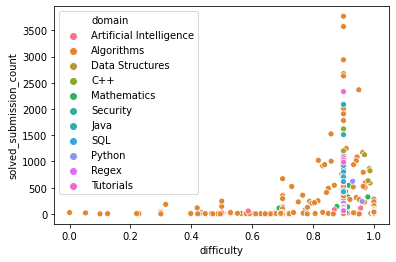

In [113]:
sns.scatterplot(x='difficulty',y='solved_submission_count',hue='domain',data=df_chall)

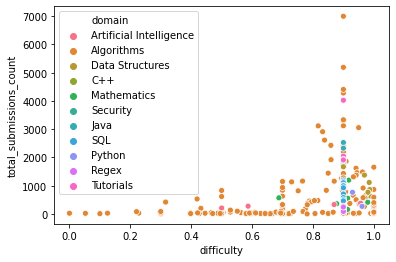

In [115]:
sns.scatterplot(x='difficulty',y='total_submissions_count',hue='domain',data=df_chall)

In [116]:
df_sub.isnull().sum()

user_id         0
contest_id      0
challenge_id    0
language        0
solved          0
created_at      0
dtype: int64

In [126]:
#applying a left join and combining the two data frames, to get the details of challenges for each userid
#inner in this case, as there are a lot of non matching contest ids

df_final=df_sub.merge(df_chall,on=['contest_id','challenge_id'],how='inner')

In [134]:
df_final

,user_id,contest_id,challenge_id,language,solved,created_at,domain,subdomain,difficulty,solved_submission_count,total_submissions_count
0,69f4b4c4607cdc48,c8ff662c97d345d2,eb1c02ce8ab444ba,cpp,0,2012-03-02 12:20:23 UTC,Algorithms,Implementation,0.7,360.0,629.0
1,69f4b4c4607cdc48,c8ff662c97d345d2,eb1c02ce8ab444ba,cpp,1,2012-03-03 09:50:11 UTC,Algorithms,Implementation,0.7,360.0,629.0
2,69f4b4c4607cdc48,c8ff662c97d345d2,eb1c02ce8ab444ba,cpp,1,2012-03-03 09:59:26 UTC,Algorithms,Implementation,0.7,360.0,629.0
3,6cb954be439f8917,c8ff662c97d345d2,eb1c02ce8ab444ba,cpp,0,2012-03-03 13:35:43 UTC,Algorithms,Implementation,0.7,360.0,629.0
4,6cb954be439f8917,c8ff662c97d345d2,eb1c02ce8ab444ba,cpp,0,2012-03-03 13:39:25 UTC,Algorithms,Implementation,0.7,360.0,629.0


In [130]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_final['challenge_id'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

results = {}

In [131]:
for idx, row in df_final.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], df_final['user_id'][i]) for i in similar_indices]

    results[row['user_id']] = similar_items[1:]
print('done!')

done!


In [132]:
def item(id):
    return df_final.loc[df_final['user_id'] == id][''].tolist()[0]

In [ ]:
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + item(rec[1]) + " (score:" + str(rec[0]) + ")")

recommend(item_id='6cb954be439f8917', num=10)